# Arabic digits recognition using a 4-Layers Neural Network:#
(from Scratch_without using any lib)

**Importing Packages:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pandas as pd

**Dataset:**

We will use the DataSet [ADBase](http://datacenter.aucegypt.edu/shazeem/).
It contains 60,000 training images, and 10,000 test image.With every image was originally 28*28px but flattened to 784 elements vectors.

In [3]:
X_train = pd.read_csv("./csvTrainImages 60k x 784.csv",header=None)
Y_train= pd.read_csv("./csvTrainLabel 60k x 1.csv",header=None)
X_test = pd.read_csv("./csvTestImages 10k x 784.csv",header=None)
Y_test = pd.read_csv("./csvTestLabel 10k x 1.csv",header=None)
print("data_loaded")

data_loaded


In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


In [5]:
print(Y_train)

       0
0      0
1      1
2      2
3      3
4      4
...   ..
59995  5
59996  6
59997  7
59998  8
59999  9

[60000 rows x 1 columns]


**One Hot encoding of test labels:**

In [6]:
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

**Standardize data to have feature values between 0 and 1:**

In [7]:
X_train=X_train/255
X_test= X_test/255

In [8]:
X_train=X_train.T
Y_train=Y_train.T
X_test=X_test.T
Y_test=Y_test.T

**Visualize a random image:**

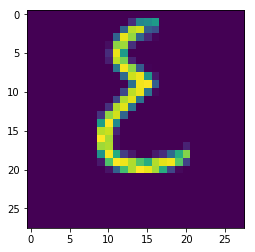

In [10]:
Y=X_train[np.random.randint(10000, size=1)]
Y_img=np.array(Y)*255
Y_img=Y_img.reshape(28,28).T
plt.imshow(Y_img)

# The Architecture and the implementation of our neural network:#

![title](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

We will use a 4-layers neural network in which the hidden layers contain 50 units.For the choice of the number of units in hidden layers we used the formula in [this](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) site

**Defining the Activation funcions:**

We will use the "Relu" in the hidden layers and the "Softmax" in the output layer(because we have a multi-class classification), and the "drelu" in the backward propagation.

In [11]:
def relu(p):
    return(np.maximum(0, p))

def softmax(u):
    return np.exp(u) / np.sum(np.exp(u), axis=0, keepdims=True)

def drelu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

**Initialization:**

We initialized the weights using the He initialization and b to zero.![title](https://miro.medium.com/max/181/1*r1xULrvfItQ_Pt7RAH226A.png)

In [12]:
parameters = {}
def initialize_parameters(layer_dims):
    L = len(layer_dims)
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*(np.sqrt(2/ layer_dims[l - 1]))
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

# Forward and Backward Propagation:#

![title](https://qph.fs.quoracdn.net/main-qimg-e599270915026aeb9b5e47cb95e8097c)

**Forward Propagation:**

![title](https://cdn-images-1.medium.com/max/1000/1*hCNyCi1K8YJ3P0fB2P7jUA.png)

In [31]:
outputs = {}
activation = {}
m = X_train.shape[1]
def forward_prop(parameters, X_train, activation):
    outputs["Z" + str(1)] = np.dot(parameters["W1"], X_train) + parameters["b1"]
    activation["A" + str(1)] = relu(outputs["Z" + str(1)])
    for l in range(2, 4):
        outputs["Z" + str(l)] = np.dot(parameters["W" + str(l)], activation["A" + str(l - 1)]) + parameters["b" + str(l)]
        activation["A" + str(l)] = relu(outputs["Z" + str(l)])
    outputs["Z4"] = np.dot(parameters["W4"], activation["A3"]) + parameters["b4"]
    activation["A4"] = softmax(outputs["Z4"])
    return outputs, activation

**Compute Cost:**

In [32]:
def compute_cost(activation):
    loss = - np.sum((Y_train * np.log(activation["A4"])), axis=0, keepdims=True)
    cost = np.sum(loss, axis=1)/m
    return cost

**Compute the gradients of the Loss:**

![title](https://render.githubusercontent.com/render/math?math=dW%5E%7B%5Bl%5D%7D%20%3D%20%5Cfrac%7B%5Cpartial%20%5Cmathcal%7BL%7D%20%7D%7B%5Cpartial%20W%5E%7B%5Bl%5D%7D%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20dZ%5E%7B%5Bl%5D%7D%20A%5E%7B%5Bl-1%5D%20T%7D%20%5Ctag%7B8%7D&mode=display)
![title](https://render.githubusercontent.com/render/math?math=db%5E%7B%5Bl%5D%7D%20%3D%20%5Cfrac%7B%5Cpartial%20%5Cmathcal%7BL%7D%20%7D%7B%5Cpartial%20b%5E%7B%5Bl%5D%7D%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%20%3D%201%7D%5E%7Bm%7D%20dZ%5E%7B%5Bl%5D%28i%29%7D%5Ctag%7B9%7D&mode=display)
![title](https://render.githubusercontent.com/render/math?math=dA%5E%7B%5Bl-1%5D%7D%20%3D%20%5Cfrac%7B%5Cpartial%20%5Cmathcal%7BL%7D%20%7D%7B%5Cpartial%20A%5E%7B%5Bl-1%5D%7D%7D%20%3D%20W%5E%7B%5Bl%5D%20T%7D%20dZ%5E%7B%5Bl%5D%7D%20%5Ctag%7B10%7D&mode=display)

In [41]:
grad_reg={}
def grad_re(parameters, outputs, activation):
    grad_reg["dZ4"] = (activation["A4"] - Y_train) / m
    for l in range(1, 4):
        grad_reg["dA" + str(4 - l)] = np.dot(parameters["W" + str(4 - l + 1)].T, grad_reg["dZ" + str(4 - l + 1)])
        grad_reg["dZ" + str(4 - l)] = grad_reg["dA" + str(4 - l)] * drelu(outputs["Z" + str(4 - l)])
    grad_reg["dW1"] = np.dot(grad_reg["dZ1"], X_train.T)
    grad_reg["db1"] = np.sum(grad_reg["dZ1"], axis=1, keepdims=True)
    for l in range(2, 5):
        grad_reg["dW" + str(l)] = np.dot(grad_reg["dZ" + str(l)], activation["A" + str(l - 1)].T)
        grad_reg["db" + str(l)] = np.sum(grad_reg["dZ" + str(l)], axis=1, keepdims=True)
    return parameters, outputs, activation, grad_reg

**Update the parameters:**

![title](https://render.githubusercontent.com/render/math?math=W%5E%7B%5Bl%5D%7D%20%3D%20W%5E%7B%5Bl%5D%7D%20-%20%5Calpha%20%5Ctext%7B%20%7D%20dW%5E%7B%5Bl%5D%7D%20%5Ctag%7B16%7D%24%24%24%24%20b%5E%7B%5Bl%5D%7D%20%3D%20b%5E%7B%5Bl%5D%7D%20-%20%5Calpha%20%5Ctext%7B%20%7D%20db%5E%7B%5Bl%5D%7D%20%5Ctag%7B17%7D&mode=display)

In [42]:
def learning(grad_reg, learning_rate=0.005):
    for i in range(1, 5):
        parameters["W" + str(i)] = parameters["W" + str(i)] - (learning_rate * grad_reg["dW" + str(i)])
        parameters["b" + str(i)] = parameters["b" + str(i)] - (learning_rate * grad_reg["db" + str(i)])
    return parameters

**Prediction:**

In [43]:
def predict(parameters, X_test):
    forward_prop(parameters, X_test, activation)
    predictions = np.round(activation["A4"])
    return predictions

**Gradient Descent:**

In [44]:
def grad_descent(num_iterations, costs, activation,print_cost = True):
    initialize_parameters(dims)
    for l in range(0, num_iterations):
        forward_prop(parameters, X_train, activation)
        cost = compute_cost(activation)
        grad_re(parameters, outputs, activation)
        learning(grad_reg, learning_rate=0.005)
        if l % 100 == 0:
            costs.append(cost)
        if print_cost and l % 100 == 0:
            print("Cost after iteration %i: %f" % (l, cost))
    return costs, parameters

**Exécution:**

In [45]:
dims=[X_train.shape[0], 50, 50, 50, 10]

In [46]:
num_iterations = 1300
costs = []

In [47]:
grad_descent(num_iterations, costs, activation)
predictions = predict(parameters, X_test)

Cost after iteration 0: 2.331194
Cost after iteration 100: 2.020938
Cost after iteration 200: 1.651200
Cost after iteration 300: 1.234961
Cost after iteration 400: 0.888801
Cost after iteration 500: 0.659208
Cost after iteration 600: 0.522293
Cost after iteration 700: 0.436890
Cost after iteration 800: 0.379667
Cost after iteration 900: 0.338829
Cost after iteration 1000: 0.308224
Cost after iteration 1100: 0.284387
Cost after iteration 1200: 0.265246


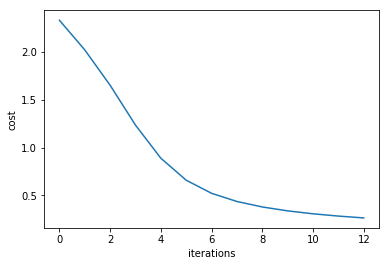

In [48]:
plt.plot(costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()   

In [49]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(predictions - Y_test)) * 100))

test accuracy: 98.441 %


3


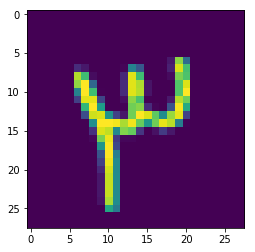

In [84]:
Y=X_test[np.random.randint(10000, size=1)]
Y_img=np.array(Y)*255
Y_img=Y_img.reshape(28,28).T
plt.imshow(Y_img)
exp=np.where(predict(parameters,np.array(Y).reshape(784,1))==1)
print(int(exp[0]))